In [1]:
from bs4 import BeautifulSoup as bs

In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

Web scraping hardware (game platforms) sales data from VGChartz.com

In [7]:
r = requests.get('https://www.vgchartz.com/analysis/platform_totals/Hardware/Global/')

In [8]:
vg_sales = bs(r.content, 'lxml')

In [9]:
table = vg_sales.find("table", { "id" : "myTable" })

In [10]:
bs(table.text)

<html><body><p>Pos
Platform
North America
Europe
Japan
Rest of World
Global




1
PlayStation 2 (PS2)
53.65
55.28
23.18
25.57
157.68


2
Nintendo DS (DS)
57.39
52.07
33.01
12.43
154.90


3
Game Boy (GB)
43.18
40.05
32.47
2.99
118.69


4
PlayStation 4 (PS4)
38.13
48.08
9.36
19.99
115.56


5
PlayStation (PS)
40.78
31.09
21.59
9.04
102.50


6
Wii (Wii)
45.51
33.88
12.77
9.48
101.64


7
PlayStation 3 (PS3)
29.42
34.99
10.47
12.53
87.41


8
Xbox 360 (X360)
49.11
25.87
1.66
9.16
85.80


9
Nintendo Switch (NS)
31.98
22.11
19.82
11.37
85.28


10
Game Boy Advance (GBA)
40.39
21.31
16.96
2.85
81.51


11
PlayStation Portable (PSP)
21.41
24.41
20.01
15.26
81.09


12
Nintendo 3DS (3DS)
25.77
21.07
24.65
4.44
75.93


13
Nintendo Entertainment System (NES)
33.49
8.30
19.35
0.77
61.91


14
Xbox One (XOne)
32.12
12.39
0.12
5.46
50.09


15
Super Nintendo Entertainment System (SNES)
22.88
8.15
17.17
0.90
49.10


16
Nintendo 64 (N64)
20.11
6.35
5.54
0.93
32.93


17
Sega Genesis (GEN)
16.98
8.39
3.58
0.59


In [11]:
table_body = table.find('tbody')

In [12]:
data = []

In [13]:
rows = table_body.find_all('tr')

In [14]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    data.append([ele for ele in cols if ele]) # Get rid of empty values

In [15]:
df = pd.DataFrame(data)

In [16]:
df.to_csv('console_sales.csv') # Saving the scraped data to a CSV file.

In [17]:
console_sales = pd.read_csv('console_sales.csv')

In [18]:
console_sales.head()

,Unnamed: 0,0,1,2,3,4,5,6
0,0,1,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
1,1,2,Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
2,2,3,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
3,3,4,PlayStation 4 (PS4),38.13,48.08,9.36,19.99,115.56
4,4,5,PlayStation (PS),40.78,31.09,21.59,9.04,102.50


Dropping unnecessary columns and renaming the columns

In [19]:
del(console_sales["Unnamed: 0"])

In [20]:
del(console_sales["0"])

In [21]:
console_sales.head()

,1,2,3,4,5,6
0,PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
1,Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
2,Game Boy (GB),43.18,40.05,32.47,2.99,118.69
3,PlayStation 4 (PS4),38.13,48.08,9.36,19.99,115.56
4,PlayStation (PS),40.78,31.09,21.59,9.04,102.50


In [22]:
console_sales.columns = ['Platform', 'North America', 'Europe', 'Japan', 'Rest of World', 'Global']

In [54]:
console_sales.head()

,North America,Europe,Japan,Rest of World,Global
Platform,,,,,
PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
Game Boy (GB),43.18,40.05,32.47,2.99,118.69
PlayStation 4 (PS4),38.13,48.08,9.36,19.99,115.56
PlayStation (PS),40.78,31.09,21.59,9.04,102.50


Setting the gaming platforms as the index

In [24]:
console_sales = console_sales.set_index("Platform")

In [25]:
console_sales.head()

,North America,Europe,Japan,Rest of World,Global
Platform,,,,,
PlayStation 2 (PS2),53.65,55.28,23.18,25.57,157.68
Nintendo DS (DS),57.39,52.07,33.01,12.43,154.90
Game Boy (GB),43.18,40.05,32.47,2.99,118.69
PlayStation 4 (PS4),38.13,48.08,9.36,19.99,115.56
PlayStation (PS),40.78,31.09,21.59,9.04,102.50


Exploring above dataset

In [26]:
print(console_sales.describe())

       North America     Europe      Japan  Rest of World      Global
count      36.000000  36.000000  36.000000      36.000000   36.000000
mean       19.022778  13.556667   8.256667       4.218056   45.054167
std        18.294156  16.565537  10.090848       6.373959   47.419213
min         0.000000   0.000000   0.000000       0.000000    0.000000
25%         2.437500   0.840000   0.030000       0.052500    4.750000
50%        16.375000   5.795000   3.455000       0.885000   26.145000
75%        32.462500  22.685000  17.012500       6.355000   82.452500
max        57.390000  55.280000  33.010000      25.570000  157.680000


In [27]:
print(console_sales.info())

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, PlayStation 2 (PS2) to TurboGrafx-16 (TG16)
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   North America  36 non-null     float64
 1   Europe         36 non-null     float64
 2   Japan          36 non-null     float64
 3   Rest of World  36 non-null     float64
 4   Global         36 non-null     float64
dtypes: float64(5)
memory usage: 1.7+ KB
None


In [28]:
console_sales.shape

(36, 5)

Loading the dataframe for video game sales 2020

In [29]:
vgsales = pd.read_csv("vgchartz-7_7_2020.csv")

In [30]:
vgsales.head()

,Unnamed: 0,img,title,console,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Series,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2020
1,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Series,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,22/03/2005,04/03/2020
2,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Series,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,16/10/2001,03/02/2020
3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,17/09/2013,NaN
4,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Series,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,23/10/1981,26/02/2020


In [31]:
vgsales.shape

(57950, 18)

In [32]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57950 entries, 0 to 57949
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     57950 non-null  int64  
 1   img            57950 non-null  object 
 2   title          57950 non-null  object 
 3   console        57950 non-null  object 
 4   genre          57950 non-null  object 
 5   publisher      57950 non-null  object 
 6   developer      57933 non-null  object 
 7   vg_score       984 non-null    float64
 8   critic_score   6544 non-null   float64
 9   user_score     386 non-null    float64
 10  total_shipped  2373 non-null   float64
 11  total_sales    19319 non-null  float64
 12  na_sales       12900 non-null  float64
 13  jp_sales       6993 non-null   float64
 14  pal_sales      13111 non-null  float64
 15  other_sales    15440 non-null  float64
 16  release_date   54296 non-null  object 
 17  last_update    11763 non-null  object 
dtypes: flo

In [33]:
vgsales["console"].unique()

array(['Series', 'PS3', 'PS4', 'PS2', 'X360', 'PC', 'XOne', 'PSP', 'PS',
       'Wii', 'DS', '3DS', 'NES', 'GC', 'WiiU', 'XB', 'N64', 'GEN',
       '2600', 'GBA', 'GB', 'PSV', 'SNES', 'DC', 'NS', 'SAT', 'XBL',
       'PSN', 'And', 'DSiW', 'OSX', 'Lynx', 'SCD', 'Linux', 'MS', 'WW',
       'ZXS', 'ACPC', 'Amig', '7800', 'VC', 'GG', 'DSi', 'PCE', '5200',
       'AJ', 'WinP', 'Mob', 'iQue', 'iOS', 'WS', 'NG', 'GIZ', '3DO', 'VB',
       'GBC', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'PCFX', 'Int', 'XSX',
       'PS5', 'C128', 'CDi', 'CD32', 'Arc', 'C64', 'BRW', 'FMT', 'MSX',
       'BBCM', 'ApII', 'Aco', 'TG16'], dtype=object)

Delete unneccesary columns and set a column as index

In [34]:
vg_sales = vgsales.set_index(["console"])

In [35]:
vg_sales.head()

,Unnamed: 0,img,title,genre,publisher,developer,vg_score,critic_score,user_score,total_shipped,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
console,,,,,,,,,,,,,,,,,
Series,3,/games/boxart/full_3351915AmericaFrontccc.jpg,Warriors,Action,Unknown,Omega Force,NaN,NaN,NaN,42.06,NaN,NaN,NaN,NaN,NaN,NaN,24/03/2020
Series,4,/games/boxart/full_5741036AmericaFrontccc.jpg,God of War,Action,Sony Computer Entertainment,SIE Santa Monica Studio|Ready at Dawn|Javagrou...,NaN,NaN,NaN,35.05,NaN,NaN,NaN,NaN,NaN,22/03/2005,04/03/2020
Series,5,/games/boxart/full_6662824AmericaFrontccc.png,Devil May Cry,Action,Capcom,Capcom|Ninja Theory,NaN,NaN,NaN,22.00,NaN,NaN,NaN,NaN,NaN,16/10/2001,03/02/2020
PS3,6,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,Action,Rockstar Games,Rockstar North,NaN,9.4,NaN,NaN,20.32,6.37,0.99,9.85,3.12,17/09/2013,NaN
Series,7,/games/boxart/full_6800951AmericaFrontccc.jpg,Frogger,Action,Konami,Konami|Parker Brothers|SCE Cambridge Studio|Bl...,NaN,NaN,NaN,20.00,NaN,NaN,NaN,NaN,NaN,23/10/1981,26/02/2020


Subsetting data on popular platforms released from 2000-2020 only

In [36]:
vg_sales = vg_sales.loc[["PS2", "PS3", "PS4", "PS5", "PSP", "PSV", "PSN", "GC", "PC", "XB", "XBL", "X360", "XOne", "XSX", "DS", "3DS", "NS", "Wii", "WiiU"]]

Slicing dataset and replace missing values

In [37]:
vg_sales_slice = vg_sales.loc[:, "title":"release_date"]

In [38]:
del(vg_sales_slice["total_shipped"])

In [39]:
del(vg_sales_slice["vg_score"])

In [40]:
del(vg_sales_slice["developer"])

In [41]:
vg_sales_slice.head()

,title,genre,publisher,critic_score,user_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
console,,,,,,,,,,,
PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,NaN,NaN,NaN,NaN,NaN,NaN,26/10/2004
PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,NaN,16.15,8.41,0.47,5.49,1.78,28/10/2002
PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,NaN,13.10,6.99,0.30,4.51,1.30,23/10/2001
PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001
PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,NaN,4.67,1.94,0.08,1.95,0.70,21/10/2002


In [42]:
vg_sales_slice.shape

(39117, 11)

Checking for and filling in missing values

In [43]:
vg_sales_slice.isna().sum()

title               0
genre               0
publisher           0
critic_score    33906
user_score      38755
total_sales     22898
na_sales        28456
jp_sales        33277
pal_sales       28230
other_sales     26427
release_date     3110
dtype: int64

<AxesSubplot:>

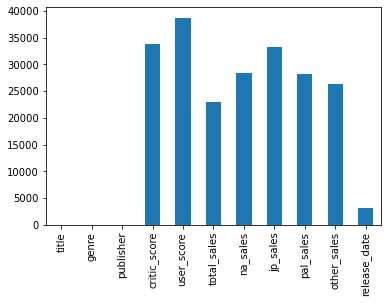

In [44]:
vg_sales_slice.isna().sum().plot(kind="bar")

In [45]:
vgsales_final = vg_sales_slice.dropna(subset=["release_date"])

In [46]:
vg_av = vgsales_final.dropna()

In [47]:
vg_av.mean()

critic_score    8.073267
user_score      8.542574
total_sales     2.173762
na_sales        1.134653
jp_sales        0.150396
pal_sales       0.638713
other_sales     0.249703
dtype: float64

In [48]:
vgsales_final = vgsales_final.fillna({"critic_score":8.1, "user_score":8.5, "total_sales":2.2, "na_sales":1.1, "jp_sales":0.2, "pal_sales":0.6, "other_sales":0.2})

In [49]:
vgsales_final.isna().sum()

title           0
genre           0
publisher       0
critic_score    0
user_score      0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
dtype: int64

In [50]:
vgsales_final.head()

,title,genre,publisher,critic_score,user_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
console,,,,,,,,,,,
PS2,Grand Theft Auto: San Andreas,Action,Rockstar Games,9.5,8.5,2.20,1.10,0.20,0.60,0.20,26/10/2004
PS2,Grand Theft Auto: Vice City,Action,Rockstar Games,9.6,8.5,16.15,8.41,0.47,5.49,1.78,28/10/2002
PS2,Grand Theft Auto III,Action,Rockstar Games,9.5,8.5,13.10,6.99,0.30,4.51,1.30,23/10/2001
PS2,Metal Gear Solid 2: Sons of Liberty,Action,Konami,9.5,7.0,6.05,2.45,0.87,2.01,0.72,12/11/2001
PS2,The Lord of the Rings: The Two Towers,Action,Electronic Arts,8.3,8.5,4.67,1.94,0.08,1.95,0.70,21/10/2002


Loading third dataset for merging later

In [72]:
games_sales = pd.read_csv("Video_Games.csv")

In [73]:
games_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
games_sales.shape

(16719, 16)

In [75]:
games_sales["Rating"].isna().sum()

6769

In [76]:
games_sales["Rating"].fillna("Unknown", inplace=True)

In [79]:
games_sales["Rating"].head()

0          E
1    Unknown
2          E
3          E
4    Unknown
Name: Rating, dtype: object